In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [32]:
import numpy as np
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt

# Reflect Tables into SQLAlchemy ORM

In [33]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [34]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [35]:
# reflect an existing database into a new model
base = automap_base()
# reflect the tables
base.prepare(engine, reflect = True)

In [36]:
# View all of the classes that automap found
base.classes.keys()

['measurement', 'station']

In [37]:
# Save references to each table
measurement = base.classes.measurement
station = base.classes.station

In [38]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [39]:
# Find the most recent date in the data set.
# Find the most recent date in the data set.
most_recent_date = session.query(measurement.date).order_by(measurement.date.desc()).first()
print(most_recent_date)

('2017-08-23',)


2016-08-23


Text(0.5, 1.0, 'Average Precipitation by Date')

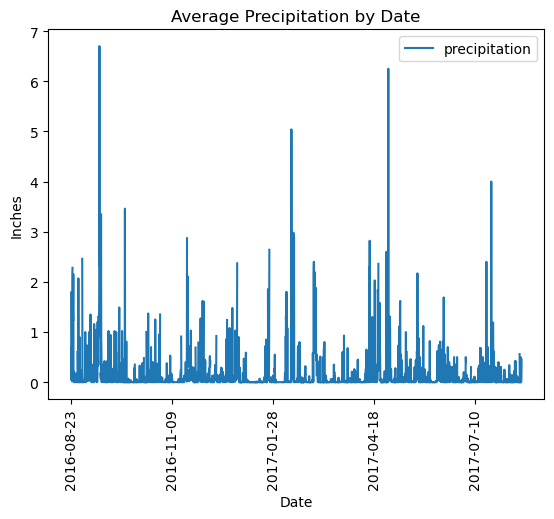

In [40]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
# find the most recent date in the dataset
most_recent_date = session.query(measurement.date).order_by(measurement.date.desc()).first()
#print(most_recent_date)

# Calculate the date one year from the last date in data set.
last_date = dt.datetime.strptime(most_recent_date[0], '%Y-%m-%d').date()
start_date = last_date - dt.timedelta(days=365)
print(start_date)

# Perform a query to retrieve the data and precipitation scores
last_year_data = session.query(measurement.date, measurement.prcp).filter(measurement.date >= start_date).all()

# Save the query results as a Pandas DataFrame. Explicitly set the column names
df = pd.DataFrame(last_year_data, columns=['date', 'precipitation'])

# Sort the dataframe by date
df = df.sort_values(by='date')
df.head()
# Use Pandas Plotting with Matplotlib to plot the data
df.plot(x='date', y='precipitation', rot=90)
plt.xlabel('Date')
plt.ylabel('Inches')
plt.title('Average Precipitation by Date')

In [41]:
# Use Pandas to calculate the summary statistics for the precipitation data
df.describe()

,precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [42]:
# Design a query to calculate the total number of stations in the dataset
station_count = session.query(func.count(station.id)).all()
station_count

[(9,)]

In [43]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
stations_by_activity = session.query(measurement.station, func.count(measurement.station)).group_by(measurement.station).order_by(func.count(measurement.station).desc()).all()
stations_by_activity

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [44]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
temp_data_by_station = session.query(func.min(measurement.tobs), func.max(measurement.tobs), func.avg(measurement.tobs)).filter(measurement.station == 'USC00519281').group_by(measurement.station).first()
temp_data_by_station

(54.0, 85.0, 71.66378066378067)

In [45]:
last_year_of_most_active_station = session.query(measurement.date, measurement.tobs).filter(func.strftime(measurement.date) >= start_date, measurement.station == 'USC00519281').group_by(measurement.date).order_by(measurement.date).all()
last_year_281_df = pd.DataFrame(last_year_of_most_active_station, columns=['date', 'temperature'])
last_year_281_df

,date,temperature
0,2016-08-23,77.0
1,2016-08-24,77.0
2,2016-08-25,80.0
3,2016-08-26,80.0
4,2016-08-27,75.0
...,...,...
347,2017-08-14,77.0
348,2017-08-15,77.0
349,2017-08-16,76.0
350,2017-08-17,76.0


Text(0, 0.5, 'Frequency')

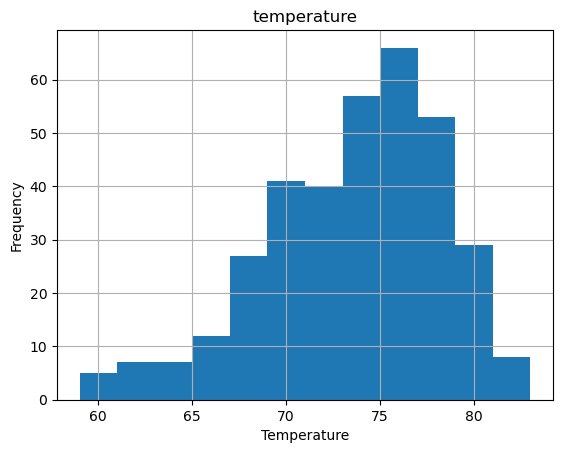

In [46]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
last_year_281_df.hist(bins=12)
plt.xlabel('Temperature')
plt.ylabel('Frequency')

# Close Session

In [16]:
# Close Session
session.close()